In [14]:
from typing import Iterable

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

In [15]:
epsilon_n_guess = np.array([.05])
L = 4
step_size = 0.1

In [16]:
def shoot_for_hw(
    x_value: np.array,
    phi_n: np.array,
    epsilon_n: float,
) -> np.array:
    """"Therefore"""
    return np.array(
        [
            phi_n[1],
            (x_value**2 - epsilon_n)*phi_n[0]
        ]
    )

def bvp_bc(phi_a, phi_b, epsilon_n):
    return np.array(
        [
            phi_a[1] - np.sqrt((-L)**2 - epsilon_n[0])*phi_a[0],
            phi_b[1] + np.sqrt((L)**2 - epsilon_n[0])*phi_b[0],
            0
        ]
    )


In [17]:
xrange = np.arange(
    -L,
    L,
    step=step_size
)
y_initial_guess = [np.sin(xrange), np.cos(xrange)]

sol = solve_bvp(
    fun=shoot_for_hw,
    bc=bvp_bc,
    x=xrange,
    y=y_initial_guess,
    p=epsilon_n_guess,
)
sol

       message: A singular Jacobian encountered when solving the collocation system.
       success: False
        status: 2
             x: [-4.000e+00 -3.900e+00 ...  3.800e+00  3.900e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x11055bef0>
             p: [ 5.000e-02]
             y: [[ 7.568e-01  6.878e-01 ... -6.119e-01 -6.878e-01]
                 [-6.536e-01 -7.259e-01 ... -7.910e-01 -7.259e-01]]
            yp: [[-6.536e-01 -7.259e-01 ... -7.910e-01 -7.259e-01]
                 [ 1.207e+01  1.043e+01 ... -8.805e+00 -1.043e+01]]
 rms_residuals: [ 1.073e+00  1.062e+00 ...  1.046e+00  1.062e+00]
         niter: 1

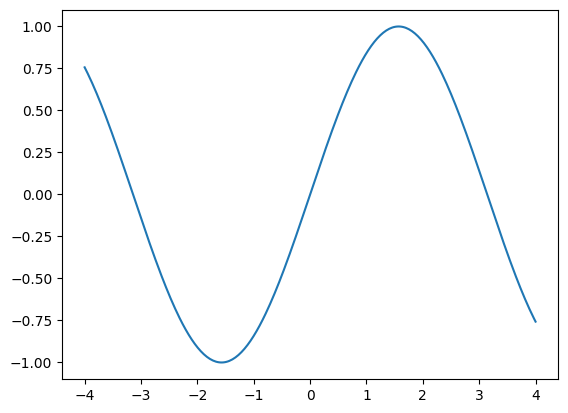

In [18]:
x_eval = np.linspace(-L, L, 300)

plt.plot(x_eval, sol.sol(x_eval)[0])
plt.show()

In [3]:
# The abdsolute value of the first 5 eigenfunctions, this should be (2,5)
A1 = None
# The corresponding first 5 eigenvalues, this should be (1,5)
A2 = None

In [19]:
def shoot2(
    x: np.array,
    xshoot: Iterable,
    n0: float,
    beta: float,
) -> np.array:
    """"this is a doc string"""
    return [x[1], (beta-n0)*x[0]]

In [20]:
xshoot = [-1, 1]
n0 = 100
beta = 50

x0 = np.array([0, 1])

y = odeint(
    shoot2,
    x0,
    xshoot,
    args=(n0, beta)
)

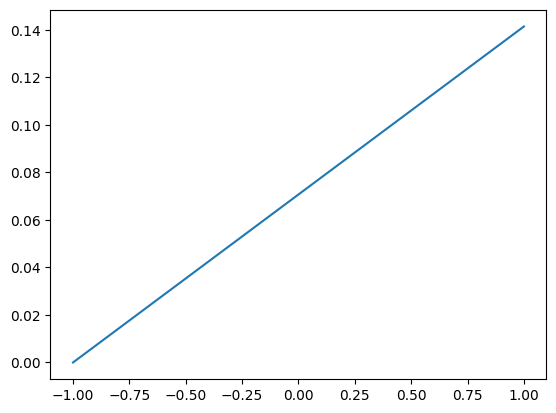

In [15]:
plt.plot(xshoot, y[:,0])
plt.show()

In [3]:
def bvpexam_rhs(
    y: np.array,
    x: float
) -> np.array:
    y_prime = [
        y[1],
        -(x**2 - np.sin(x))*y[1] + np.cos(x)**2*y[0] + 5
    ]
    return y_prime

In [4]:
xspan = [0, 1]
y_1_at_0 = 3
y_2_at_1 = 5

A = -3
dA = 0.5

for j in range(100):
    y0 = [3, A]
    x = np.linspace(xspan[0], xspan[1], 100)
    ysol = odeint(bvpexam_rhs, y0=y0, t=x)

    if np.abs(ysol[-1, 1] - y_2_at_1) < 1e-6:
        break

    if ysol[-1, 1]  < 5:
        A += dA
    else:
        A -= dA
        dA /= 2
    